# Machine Learning (Deep Learning)Based

# 1. Re-code the house price machine learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
import functools

In [2]:
data = datasets.load_boston()

假设房价满足一个多元一次方程, $\theta$是方程的参数

In [3]:
def hypothesis(theta, X):
    """y = theta * x + b
    """
    if len(X.shape) == 2:
        return (X * theta).sum(1)
    else:
        return (X * theta).sum()

使用均方损失，则代价函数为

$$J_{\theta} = \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x^i) - y^i)^2 $$

In [4]:
def cost_func(X, y):
    """
    代价函数
    :param X:
    :param y:
    :return:
    """
    def f(theta):
        y_hat = hypothesis(theta, X)
        # 计算均方损失
        return np.sum(np.power((y - y_hat), 2))/len(y) / 2
    return f

代价函数对自变量求导，单个$\theta$的偏导数为
$$\begin{align}
\frac{\partial }{\partial \theta_j} J(\theta_0,\theta_1,...,\theta_n) &= \frac{1}{2m} \sum_{i=1}^m ( h_\theta(x_0^i,x_1^i,x_2^i,...,x_n^i) - y^i)^2 d\theta_j \\
&= \frac{1}{m} \sum_{i=1}^m ( h_\theta(x_0^i,x_1^i,x_2^i,...,x_n^i) - y^i)x_j^i
\end{align}$$

In [5]:
def cost_func_gradient(X, y):
    """
    求代价函数的梯度
    :param X:
    :param y:
    :return:
    """
    def f(theta):
        m = len(X)
        partial_theta = []
        yhat = hypothesis(theta, X)
        for j, t in enumerate(theta):
            x_ij = [x[j] for x in X]
            pt = ((yhat - y) * x_ij).sum() / m
            partial_theta.append(pt)
        return np.array(partial_theta)
    return f

In [6]:
def computeNumericalGradient(loss_func, x):
    """
    使用极限来计算梯度，用于验证导数梯度的正确性
    :param loss_func:
    :param x:
    :return:
    """
    e = 1e-4;
    if isinstance(x, np.ndarray):
        numgrad = []
        for j, t in enumerate(x):
            perturb = np.zeros(x.shape)
            perturb[j] = e
            loss1 = loss_func(x - perturb)
            loss2 = loss_func(x + perturb)
            ng = (loss2 - loss1) / (2 * e);
            numgrad.append(ng)
        return np.array(numgrad)
    else:
        loss1 = loss_func(x - e)
        loss2 = loss_func(x + e)
        ng = (loss2 - loss1) / (2 * e)
        return ng

In [7]:
def get_random_theta(l):
    """
    随机初始化一个点
    :param l:
    :return:
    """
    import random
    return np.array([random.random() * 200 - 100 for i in range(0, l)])

In [8]:
X, y = data['data'], data['target']
feature_num = X.shape[1]
# 随机生成一些点计算梯度
thetas = [get_random_theta(feature_num) for i in range(0,10)]
numgrad = np.array([ computeNumericalGradient(cost_func(X, y), t) for t in thetas])
grad = np.array([ cost_func_gradient(X, y)(t) for t in thetas])

In [9]:
# 差别足够小则认为导函数是正确的

In [10]:
diff = np.linalg.norm(numgrad-grad)/np.linalg.norm(numgrad+grad)
diff

3.672329390160159e-11

In [11]:
def gradient_descent(start, f, df, learning_rate=0.1, max_iter=1000, accuracy = 0.001):
    # 批量梯度下降
    x = start
    num_iter = 0
    lastValue = np.inf
    trace_point = []
    while num_iter <= max_iter:
        v = f(x)
        print("num_iter = %f, v  = %f" % (num_iter, v))
        trace_point.append((x, v))
        diff = abs(v - lastValue)
        if diff <= accuracy:
            break
        lastValue = v
        g = df(x)
        x = x - learning_rate * g
        num_iter += 1
    return x, np.array(trace_point)


In [12]:
X, y = data['data'], data['target']
b = np.ones(len(X))
# 把自变量归一化一下
X = (X-X.min(0))/(X.max(0)-X.min(0))
X = np.column_stack((X,b))

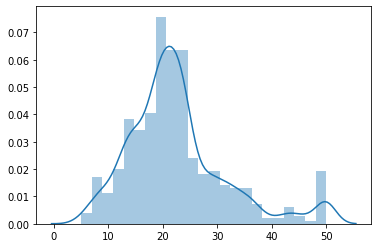

In [13]:
sns.distplot(y)

In [14]:
feature_num = X.shape[1]
start_theta = get_random_theta(feature_num)
extremum_theta, traces = gradient_descent(start_theta, cost_func(X, y), functools.partial(computeNumericalGradient, cost_func(X, y)), max_iter=200, learning_rate=0.1)

num_iter = 0.000000, v  = 16405.669685
num_iter = 1.000000, v  = 7927.452108
num_iter = 2.000000, v  = 4563.136096
num_iter = 3.000000, v  = 3187.624563
num_iter = 4.000000, v  = 2588.173690
num_iter = 5.000000, v  = 2293.981996
num_iter = 6.000000, v  = 2122.114074
num_iter = 7.000000, v  = 2001.334913
num_iter = 8.000000, v  = 1903.763012
num_iter = 9.000000, v  = 1818.353168
num_iter = 10.000000, v  = 1740.607643
num_iter = 11.000000, v  = 1668.583431
num_iter = 12.000000, v  = 1601.342216
num_iter = 13.000000, v  = 1538.348090
num_iter = 14.000000, v  = 1479.233023
num_iter = 15.000000, v  = 1423.705061
num_iter = 16.000000, v  = 1371.511966
num_iter = 17.000000, v  = 1322.426402
num_iter = 18.000000, v  = 1276.239539
num_iter = 19.000000, v  = 1232.757963
num_iter = 20.000000, v  = 1191.801909
num_iter = 21.000000, v  = 1153.204057
num_iter = 22.000000, v  = 1116.808561
num_iter = 23.000000, v  = 1082.470228
num_iter = 24.000000, v  = 1050.053767
num_iter = 25.000000, v  = 1019.43

num_iter = 239.000000, v  = 150.751876
num_iter = 240.000000, v  = 150.094783
num_iter = 241.000000, v  = 149.443096
num_iter = 242.000000, v  = 148.796753
num_iter = 243.000000, v  = 148.155690
num_iter = 244.000000, v  = 147.519846
num_iter = 245.000000, v  = 146.889158
num_iter = 246.000000, v  = 146.263568
num_iter = 247.000000, v  = 145.643014
num_iter = 248.000000, v  = 145.027440
num_iter = 249.000000, v  = 144.416786
num_iter = 250.000000, v  = 143.810995
num_iter = 251.000000, v  = 143.210013
num_iter = 252.000000, v  = 142.613782
num_iter = 253.000000, v  = 142.022249
num_iter = 254.000000, v  = 141.435359
num_iter = 255.000000, v  = 140.853059
num_iter = 256.000000, v  = 140.275296
num_iter = 257.000000, v  = 139.702020
num_iter = 258.000000, v  = 139.133178
num_iter = 259.000000, v  = 138.568720
num_iter = 260.000000, v  = 138.008597
num_iter = 261.000000, v  = 137.452759
num_iter = 262.000000, v  = 136.901159
num_iter = 263.000000, v  = 136.353748
num_iter = 264.000000, v 

num_iter = 492.000000, v  = 68.910611
num_iter = 493.000000, v  = 68.748460
num_iter = 494.000000, v  = 68.586922
num_iter = 495.000000, v  = 68.425996
num_iter = 496.000000, v  = 68.265676
num_iter = 497.000000, v  = 68.105961
num_iter = 498.000000, v  = 67.946845
num_iter = 499.000000, v  = 67.788327
num_iter = 500.000000, v  = 67.630402
num_iter = 501.000000, v  = 67.473067
num_iter = 502.000000, v  = 67.316320
num_iter = 503.000000, v  = 67.160156
num_iter = 504.000000, v  = 67.004572
num_iter = 505.000000, v  = 66.849566
num_iter = 506.000000, v  = 66.695133
num_iter = 507.000000, v  = 66.541272
num_iter = 508.000000, v  = 66.387978
num_iter = 509.000000, v  = 66.235249
num_iter = 510.000000, v  = 66.083081
num_iter = 511.000000, v  = 65.931472
num_iter = 512.000000, v  = 65.780419
num_iter = 513.000000, v  = 65.629918
num_iter = 514.000000, v  = 65.479966
num_iter = 515.000000, v  = 65.330561
num_iter = 516.000000, v  = 65.181699
num_iter = 517.000000, v  = 65.033378
num_iter = 5

num_iter = 732.000000, v  = 42.277843
num_iter = 733.000000, v  = 42.203203
num_iter = 734.000000, v  = 42.128778
num_iter = 735.000000, v  = 42.054565
num_iter = 736.000000, v  = 41.980564
num_iter = 737.000000, v  = 41.906774
num_iter = 738.000000, v  = 41.833195
num_iter = 739.000000, v  = 41.759826
num_iter = 740.000000, v  = 41.686667
num_iter = 741.000000, v  = 41.613715
num_iter = 742.000000, v  = 41.540971
num_iter = 743.000000, v  = 41.468435
num_iter = 744.000000, v  = 41.396104
num_iter = 745.000000, v  = 41.323979
num_iter = 746.000000, v  = 41.252059
num_iter = 747.000000, v  = 41.180343
num_iter = 748.000000, v  = 41.108830
num_iter = 749.000000, v  = 41.037519
num_iter = 750.000000, v  = 40.966411
num_iter = 751.000000, v  = 40.895504
num_iter = 752.000000, v  = 40.824797
num_iter = 753.000000, v  = 40.754290
num_iter = 754.000000, v  = 40.683982
num_iter = 755.000000, v  = 40.613873
num_iter = 756.000000, v  = 40.543961
num_iter = 757.000000, v  = 40.474246
num_iter = 7

num_iter = 982.000000, v  = 28.743208
num_iter = 983.000000, v  = 28.704901
num_iter = 984.000000, v  = 28.666689
num_iter = 985.000000, v  = 28.628573
num_iter = 986.000000, v  = 28.590553
num_iter = 987.000000, v  = 28.552627
num_iter = 988.000000, v  = 28.514797
num_iter = 989.000000, v  = 28.477060
num_iter = 990.000000, v  = 28.439418
num_iter = 991.000000, v  = 28.401870
num_iter = 992.000000, v  = 28.364415
num_iter = 993.000000, v  = 28.327054
num_iter = 994.000000, v  = 28.289786
num_iter = 995.000000, v  = 28.252610
num_iter = 996.000000, v  = 28.215527
num_iter = 997.000000, v  = 28.178537
num_iter = 998.000000, v  = 28.141638
num_iter = 999.000000, v  = 28.104831
num_iter = 1000.000000, v  = 28.068116


## 求解的参数为

In [15]:
extremum_theta

array([ -3.22082153,  18.81384647,  10.45465447,   3.47066594,
       -37.33336946,  44.79010671,   1.79599176, -42.82324733,
        -0.45994074,   2.83483718,  -4.8473935 ,  13.6950109 ,
         1.91369631,   3.92009337])

# 2. Answer following questions

1. Why do we need machine learning methods instead of creating a complicated formula?

Ans: 机器能够自动跟随变化的数据重建公式，而且可以可以生成一些非常复杂人力很难直观理解的公式，而这些人类很难做到

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

Ans: 随机选择参数的话，没有目的性，很难找到真的解

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

Ans: 第二种方法优于第一种方法，但是它只能知道大概的前进方向，却不知道精确的方向。

4. Why do we use Derivative / Gredient to fit a target function?

Ans: 梯度即各个自变量的偏导数组成的偏导向量，梯度的方向即函数增长最快的方向，反之，梯度的反方向即是函数值下降最快的方向。使用梯度下降来求解损失函数的最小值，其最小值的点也就是损失函数拟合得最好的点。

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans: 梯度即各个自变量的偏导数组成的偏导向量，梯度的方向即函数增长最快的方向，反之，梯度的反方向即是函数值下降最快的方向。

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 梯度下降能够精确的知道当前位置函数值减少最快的方向，不用盲目的去做无用的尝试，可以很快的找到损失函数的极值点。

7. Using the simple words to describe: What's the machine leanring.

Ans: 机器学习就是让机器从数据中学习一种方法以解决特定的问题，并且随着数据的增多，机器学到的方法的性能也随之提高。

# 3. Finish the search problem

In [16]:
# 爬取深圳地铁站点

In [32]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait

In [18]:
url = "http://www.szmc.net/ver2/operating/search"

In [33]:
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=chrome_options)
driver.implicitly_wait(10)

In [82]:
driver.get(url)

In [84]:
lines = [(a.get_attribute("href"), a.find_element_by_tag_name("span").text) for a in driver.find_element_by_class_name("xianlu").find_elements_by_tag_name("a")]

In [95]:
lines

[('http://www.szmc.net/ver2/operating/search?scode=0101&xl=1', '1号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0201&xl=2', '2号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0301&xl=3', '3号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0401&xl=4', '4号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0501&xl=5', '5号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0601&xl=6', '7号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0701&xl=7', '9号线'),
 ('http://www.szmc.net/ver2/operating/search?scode=0801&xl=8', '11号线')]

In [102]:
subway_sites = {}
for site_url, site_name in lines:
    driver.get(site_url)
    subway_sites[site_name] = [s.text for s in driver.find_element_by_id("siteList").find_elements_by_tag_name("a")]

In [162]:
# 构建地铁图
subway_site_map = {}
for line_name, sites in subway_sites.items():
    for i in range(0, len(sites)):
        if not subway_site_map.get(sites[i]):
            subway_site_map[sites[i]] = {} 
            subway_site_map[sites[i]]['line'] = set()
        if not subway_site_map[sites[i]].get("neighbours"):
            subway_site_map[sites[i]]['neighbours'] = {}
        subway_site_map[sites[i]]['line'].add(line_name)
        if i < len(sites) - 1:
            subway_site_map[sites[i]]['neighbours'][sites[i + 1]] = {"line": line_name}
        if i > 0:
            subway_site_map[sites[i]]['neighbours'][sites[i - 1]] = {"line": line_name}
            


In [163]:
subway_site_map['世界之窗站']

{'line': {'1号线', '2号线'},
 'neighbours': {'白石洲站': {'line': '1号线'},
  '华侨城站': {'line': '1号线'},
  '侨城北站': {'line': '2号线'},
  '红树湾站': {'line': '2号线'}}}

In [164]:
subway_site_map['安托山站']

{'line': {'2号线', '7号线'},
 'neighbours': {'侨香站': {'line': '2号线'},
  '深康站': {'line': '2号线'},
  '农林站': {'line': '7号线'},
  '深云站': {'line': '7号线'}}}

In [165]:
subway_site_map['民乐站']

{'line': {'4号线'},
 'neighbours': {'白石龙站': {'line': '4号线'}, '上梅林站': {'line': '4号线'}}}

In [166]:
subway_site_map

{'罗湖站': {'line': {'1号线'}, 'neighbours': {'国贸站': {'line': '1号线'}}},
 '国贸站': {'line': {'1号线'},
  'neighbours': {'老街站': {'line': '1号线'}, '罗湖站': {'line': '1号线'}}},
 '老街站': {'line': {'1号线', '3号线'},
  'neighbours': {'大剧院站': {'line': '1号线'},
   '国贸站': {'line': '1号线'},
   '晒布站': {'line': '3号线'},
   '红岭站': {'line': '3号线'}}},
 '大剧院站': {'line': {'1号线', '2号线'},
  'neighbours': {'科学馆站': {'line': '1号线'},
   '老街站': {'line': '1号线'},
   '湖贝站': {'line': '2号线'},
   '燕南站': {'line': '2号线'}}},
 '科学馆站': {'line': {'1号线'},
  'neighbours': {'华强路站': {'line': '1号线'}, '大剧院站': {'line': '1号线'}}},
 '华强路站': {'line': {'1号线'},
  'neighbours': {'岗厦站': {'line': '1号线'}, '科学馆站': {'line': '1号线'}}},
 '岗厦站': {'line': {'1号线'},
  'neighbours': {'会展中心站': {'line': '1号线'}, '华强路站': {'line': '1号线'}}},
 '会展中心站': {'line': {'1号线', '4号线'},
  'neighbours': {'购物公园站': {'line': '1号线'},
   '岗厦站': {'line': '1号线'},
   '市民中心站': {'line': '4号线'},
   '福民站': {'line': '4号线'}}},
 '购物公园站': {'line': {'1号线', '3号线'},
  'neighbours': {'香蜜湖站': {'line': '1号线

In [143]:
import queue
import copy

In [170]:
def _search_path(state, dst,success_plan):
    def update_state_with_site(site, new_line):
        """更新当前方案的权重信息"""
        new_state = copy.deepcopy(state)
        # cur = new_state["path"][-1]
        # if not subway_site_map.get(cur):
        #     cur = new_state["path"][-2]
        new_state['sites'] += 1
        if len(new_state["path"]) >= 2:
            a2site = new_state["path"][-2]
            if not subway_site_map.get(a2site):
                a2site = new_state["path"][-3]
            if new_line not in subway_site_map[a2site]['line']:
                new_state['lines'] += 1
                new_state['path'].append("(换乘%s)" % new_line)
        new_state['path'].append(site)
        return new_state

    def is_good_plan(new_state):
        """
        根据已经找到的方案判断是否值得搜索，剪枝以减少搜索范围
        :param next_site:
        :return:
        """
        if len(success_plan) == 0:
            return True, "not found plan yet"
        min_sites = min(i["sites"] for i in success_plan)
        min_lines = min(i["lines"] for i in success_plan)
        if new_state["sites"] < min_sites:
                return True, "sites %s < %s" % (new_state["sites"], min_sites)
        elif new_state["lines"] < min_lines:
                return True, "lines %s < %s" % (new_state["lines"], min_lines)
        return False, "Stop"

    cur = state["path"][-1]
    if not subway_site_map.get(cur):
        cur = state["path"][-2]
    # 返回搜索的方案
    for next_site, v in subway_site_map[cur]["neighbours"].items():
        if next_site in state["path"]:
            continue
        path = state["path"] + [next_site]
        # print('-->'.join(path))
        new_line = v["line"]
        if next_site == dst:
            # 到达目的地
            # print("Found!!!")
            yield True, update_state_with_site(next_site, new_line)
        else:
            new_state = update_state_with_site(next_site, new_line)
            # 剪枝以减少搜索
            isgood, msg = is_good_plan(new_state)
            # print(msg)
            if isgood:
                yield False, new_state

In [175]:
def search(src, dst, prefer="最少站点"):
    search_task = queue.Queue()  # BFS 搜索
    init_state = {
        # 当前的路径
        "path": [src],
        # 当前方案的站点数
        "sites": 1,
        # 当前方案的换乘数
        "lines": 1,
        # 当前方案的距离
        "dist": 0,
        # 当前方案的时长
        "time_cost": 0,

    }
    search_task.put(init_state)
    success_plan = []  # 搜索到的方案
    while not search_task.empty():
        p = search_task.get()
        for if_found, plan in _search_path(p, dst, success_plan):
            if if_found:
                success_plan.append(plan)
            else:
                search_task.put(plan)
    if len(success_plan) == 0:
        print("没有找到合适的方案！")
        return
    elif prefer == "最少站点":
        plan = sorted(success_plan, key=lambda x: x['sites'])[0]
    elif prefer == "最少换乘":
        plan = sorted(success_plan, key=lambda x: x['lines'])[0]
    print("已经为您找到方案：")
    print('-->'.join(plan["path"]))
    print("总站点数：%d, 需要换乘 %d 次" % (plan["sites"], plan["lines"] - 1))



In [176]:
search("深康站", "农林站")

已经为您找到方案：
深康站-->安托山站-->(换乘7号线)-->农林站
总站点数：3, 需要换乘 1 次


In [177]:
search("坂田站", "科苑站", "最少站点")

已经为您找到方案：
坂田站-->五和站-->民治站-->深圳北站-->(换乘4号线)-->白石龙站-->民乐站-->上梅林站-->莲花北站-->少年宫站-->(换乘3号线)-->福田站-->(换乘11号线)-->车公庙站-->红树湾南站-->后海站-->(换乘2号线)-->科苑站
总站点数：14, 需要换乘 4 次


In [178]:
search("坂田站", "科苑站", "最少换乘")

已经为您找到方案：
坂田站-->杨美站-->上水径站-->下水径站-->长龙站-->布吉站-->百鸽笼站-->布心站-->太安站-->怡景站-->黄贝岭站-->(换乘2号线)-->湖贝站-->大剧院站-->燕南站-->华强北站-->岗厦北站-->市民中心站-->福田站-->莲花西站-->景田站-->香梅北站-->香蜜站-->侨香站-->安托山站-->深康站-->侨城北站-->世界之窗站-->红树湾站-->科苑站
总站点数：29, 需要换乘 1 次
